<a href="https://colab.research.google.com/github/mukkatharun/DimensionalityReductionTechniques/blob/main/DimensionalityReductionTechniquesTabular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dimensionality Reduction Techniques on Tabular dataset**

Using kaggle's Cancer dataset to apply all the 6 Algo and compare which could be the better dimensionality reduction technique for this dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**Data Exploration (EDA)**

In [4]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [5]:
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


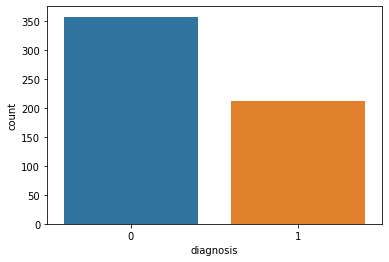

In [6]:
sns.countplot(data['diagnosis'],label="Count")

In [7]:
features_mean= list(data.columns[1:11])

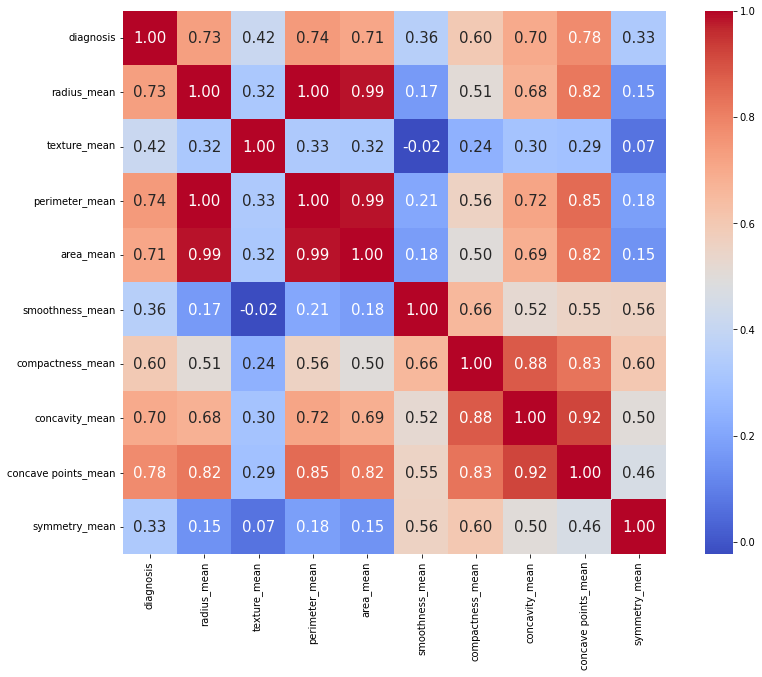

In [8]:
#Using the correlation matrix to find the features that affect the target value
corr = data[features_mean].corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm')

In [9]:
df = data[['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']]
df = df.dropna()

In [10]:
df.isna().count()

texture_mean        569
perimeter_mean      569
smoothness_mean     569
compactness_mean    569
symmetry_mean       569
dtype: int64

In [11]:
df.head()

,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,symmetry_mean
0,10.38,122.80,0.11840,0.27760,0.2419
1,17.77,132.90,0.08474,0.07864,0.1812
2,21.25,130.00,0.10960,0.15990,0.2069
3,20.38,77.58,0.14250,0.28390,0.2597
4,14.34,135.10,0.10030,0.13280,0.1809


**Data Standardisation**

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(df)

**Principal Component Analysis (PCA)**

In [13]:
from sklearn.decomposition import PCA
pca = PCA(2)
# fit on data
principalComponents = pca.fit_transform(scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1','principal component 2'])
var = data.iloc[:,1].values
principalDf['diagnosis']=pd.Series(var)
principalDf.head()

,principal component 1,principal component 2,diagnosis
0,3.841611,2.115679,1
1,-0.102414,-0.891042,1
2,2.224816,-0.454697,1
3,4.789008,2.232009,1
4,0.915797,0.045724,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


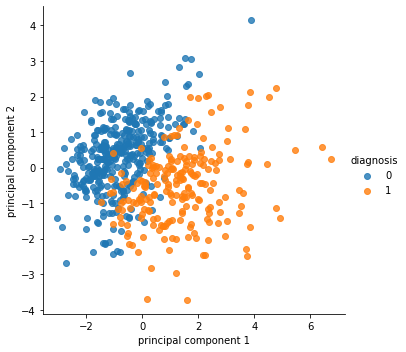

In [14]:
import seaborn as sns
sns.lmplot('principal component 1', 'principal component 2', data=principalDf, hue='diagnosis', fit_reg=False)

plt.show()

In [15]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
svd_data = svd.fit_transform(scaled)

principalDf = pd.DataFrame(data = svd_data
             , columns = ['svd component 1','svd component 2'])
var = data.iloc[:,1].values
principalDf['diagnosis']=pd.Series(var)
principalDf.head()

,svd component 1,svd component 2,diagnosis
0,3.841611,2.115679,1
1,-0.102414,-0.891042,1
2,2.224816,-0.454697,1
3,4.789008,2.232009,1
4,0.915797,0.045724,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


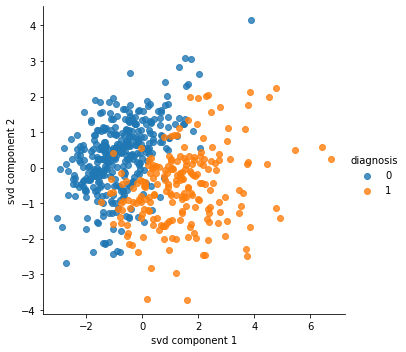

In [206]:
import seaborn as sns
sns.lmplot('svd component 1', 'svd component 2', data=principalDf, hue='diagnosis', fit_reg=False)

plt.show()

**Locally Linear Embedding**

In [207]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, eigen_solver='dense')
scaled.shape
lle_data = lle.fit_transform(scaled)


In [220]:
principalDf = pd.DataFrame(data = lle_data
             , columns = ['lle component 1','lle component 2'])
# principalDf['principal component 1', 'principal component 2']
# principalDf['MSRP_CLASS']=data['MSRP_CLASS']
# principalDf
var = data.iloc[:,1].values
# b=df.iloc[:,1:].values
# df['column_name']=pd.Series(arr)
principalDf['diagnosis']=pd.Series(var)
principalDf.head()

,lle component 1,lle component 2,diagnosis
0,-0.036766,0.043873,1
1,-0.000282,0.020591,1
2,0.007873,-0.025288,1
3,-0.045058,0.131395,1
4,-0.009500,-0.007465,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


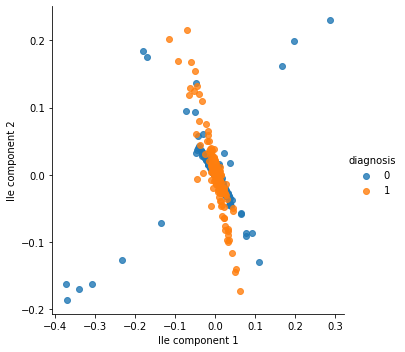

In [209]:
import seaborn as sns 
sns.lmplot('lle component 1', 'lle component 2', data=principalDf, hue='diagnosis', fit_reg=False)

plt.show()

**t-distributed stochastic neighbor embedding (tsne)**

In [210]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_data = tsne.fit_transform(scaled)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.022s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 0.676493
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.563412
[t-SNE] KL divergence after 300 iterations: 0.876830


In [219]:
principalDf = pd.DataFrame(data = tsne_data
             , columns = ['tsne component 1','tsne component 2'])
var = data.iloc[:,1].values
principalDf['diagnosis']=pd.Series(var)
principalDf.head()

,tsne component 1,tsne component 2,diagnosis
0,-13.452127,6.622344,1
1,-6.864831,-6.573330,1
2,-12.837765,0.065304,1
3,-11.876790,6.795322,1
4,-8.381914,-3.142379,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


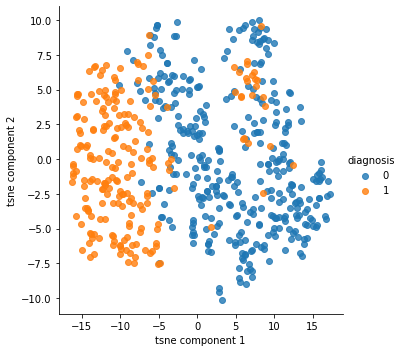

In [213]:
import seaborn as sns
sns.lmplot('tsne component 1', 'tsne component 2', data=principalDf, hue='diagnosis', fit_reg=False)

plt.show()

**Uniform Manifold Approximation and Projection (UMAP)**

In [225]:
import umap
umap_data = umap.UMAP(n_neighbors=50,
                      min_dist=0.3,
                      metric='correlation').fit_transform(scaled)

In [226]:
principalDf = pd.DataFrame(data = umap_data
             , columns = ['umap component 1','umap component 2'])
var = data.iloc[:,1].values
principalDf['diagnosis']=pd.Series(var)
principalDf.head()

,umap component 1,umap component 2,diagnosis
0,9.928617,3.084583,1
1,4.999404,-0.037106,1
2,7.597219,0.528176,1
3,9.468954,5.109567,1
4,7.822336,0.712393,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


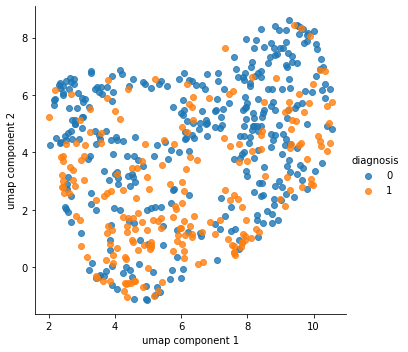

In [227]:
import seaborn as sns
sns.lmplot('umap component 1', 'umap component 2', data=principalDf, hue='diagnosis', fit_reg=False)

plt.show()

**Isometric Mapping (Isomap)**

In [229]:
from sklearn.manifold import Isomap
embed = Isomap(n_components = 2)
isomap_data = embed.fit_transform(scaled)


In [230]:
principalDf = pd.DataFrame(data = isomap_data
             , columns = ['isomap component 1','isomap component 2'])
var = data.iloc[:,1].values
principalDf['diagnosis']=pd.Series(var)
principalDf.head()

,isomap component 1,isomap component 2,diagnosis
0,5.307941,2.330381,1
1,-0.029591,-1.479955,1
2,3.828996,-0.335987,1
3,5.403701,2.919200,1
4,1.140564,-0.282830,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


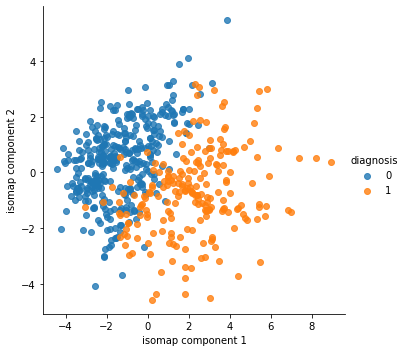

In [231]:
import seaborn as sns
sns.lmplot('isomap component 1', 'isomap component 2', data=principalDf, hue='diagnosis', fit_reg=False)

plt.show()

**Conclusion**

After analysing all the 6 algo's visualizations, **isomap** performs better dimensionality reduction for this particular dataset. In other visualisations we can see a lot of overlapping of data points when compared to Isomap.